In [1]:
from prerequisites import *

# Chapter 1 One-Dimensional maps
***

## Chapter 1.1 One-Dimensional maps
***

### Dynamical system
***
*Tldr*: A dynamical system consists of a set of *possible states*, together with a
*rule* that determines the present state in terms of past states.  
***Def***: In the most general sense a dynamical system is a tuple $(T, M, \Phi)$ where $T$ is a monoid (representing an **evolution parameter** i.e. time), written additively, $M$ is a non-empty set (representing **state space**) and $\Phi:U\subseteq T\times M\rightarrow M$ is a function (called the **evolution function**) with
 * $\Phi(0, x) = x$, i.e. every state in state space starts as itself.
 * $\Phi(t_1, \Phi(t_2, x)) = \Phi(t_1+t_2, x)$ for $t_1, t_1+t_2\in I(x)$ and $t_2\in I(\Phi(t_1, x))$, where $I(y)$ is the set of all times for which the elovution function is defined at $y\in M$. We call the $x$ in $\Phi(t, x)$ the **initial value**. This condition tells us how to continue evolution of a system after we have already evolved it for a bit.

Ex: Let $T = \mathbb{N}_0, M = [0,1]$ and $\Phi:\mathbb{N}_0\times [0,1]\rightarrow [0,1]$ be given by $\Phi(n, x) = f(\Phi(n-1, x))$ where $f(x) = 2x(1-x)$.  

In [2]:
# T and M are implicit
def f(x):
    return 2*x*(1-x)

def Phi(n, x):
    if n == 0:
        return x
    return f(Phi(n-1, x))

 Depending properties of $T, M, \Phi$ we further distinguish:
  * A *continuous time* dynamical system is one where $T = \mathbb{R}$ or $T = \mathbb{R}_{\geq0}$
  * A *discrete time* dynamical system is one where $T = \mathbb{N}_0$
  * Sometimes we do not know a precise value of $x$, and would rather consider a subset of $X\subseteq M$ possibly with some measure or probability distribution on it, as our starting point. In this case we get a *stochastic* dynamical system. 
  * In this course, however we will only consider *deterministic* dynamical systems, which are precisely as we defined above.
  * A one-dimensional dynamical system is one where $M$ is one dimensional (most often a subset of $\mathbb{R}$).
  * A $n$-dimensional dynamical system is one where $M$ is $n$-dimensional (most often a subset of $\mathbb{R}^n$).

Ex: In our example above, we have a one-dimensional discrete-time deterministic system.

### Map
***
**Def**: A **map** is an automorphism, i.e. a function $f:X\rightarrow X$.  
*Rem*: A map $f$ gives rise to the discrete time dynamical system $(\mathbb{N}_0, X,\Phi)$ where $\Phi(x, n) = f(\Phi(x, n-1))$. We confusingly also call these dynamical systems maps, and often simply refer to them by their map-function.  
Ex: Our example above arises from the map $f:[0,1]\rightarrow[0,1] $, given by $f(x) = 2x(1-x)$.

### Orbit
***
*Tldr*: Where does our initial value go?  
**Def**: An **orbit** of a point $x\in M$ is the set $\gamma_x = \{\Phi(x, t)\,|\,t\in I(x)\}$.  
*Rem*: An orbit of a map is just the set $\{x, f(x), f^2(x),\ldots\}$.  
Ex: Consider the first ten elements of the orbit of $x = 0.1$ under the above map to four digit precision (Note that this is not a set in the code, but rather an ordered sequence. This is reasonable for discrete time DS's):

In [3]:
def f(x):
    return 2*x*(1-x)

print(tabulate({"n":range(11), 
                "x_n":orbit_of_map(0.1, f, None, 10)}, 
               headers="keys", 
               floatfmt=".4f",
               tablefmt="orgtbl"))

|   n |    x_n |
|-----+--------|
|   0 | 0.1000 |
|   1 | 0.1800 |
|   2 | 0.2952 |
|   3 | 0.4161 |
|   4 | 0.4859 |
|   5 | 0.4996 |
|   6 | 0.5000 |
|   7 | 0.5000 |
|   8 | 0.5000 |
|   9 | 0.5000 |
|  10 | 0.5000 |


### Fixed point
***
*Tldr*: Why isnt this point moving?  
**Def**: A point $p\in M$ is called a *fixed point* if $\gamma_p = \{p\}$ i.e. $\Phi(t, p) = p$ for all $t\in T$.  
*Rem*: For maps, this is the same as saying that $f(p) = p$. In this case we may also determine the fixed points graphically by looking at intersection points of $y = f(x)$ and $y = x$.  
Ex: In our running example, to find the fixed point we want to solve $2x(1-x) = x\Rightarrow 2x^2-x=0\Rightarrow x(2x-1) = 0$, so the fixed points are $p = 0$ and $p = \frac{1}{2}$.  
We can verify this visually by considering the plot:

The numerical fixed points found are p = -0.000 and p = 0.500


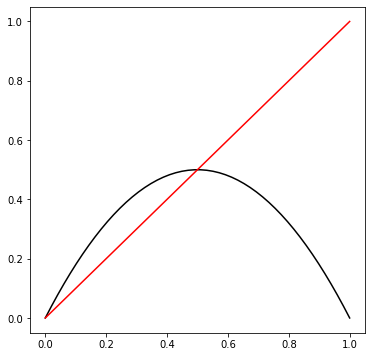

In [4]:
x = np.linspace(0, 1)
fig, ax = plt.subplots(1, 1, figsize=(6,6))
ax.plot(x, f(x), 'k');
ax.plot(x, x, 'r');
print("The numerical fixed points found are p = {0:.3f} and p = {1:.3f}".format( 
      optimize.root_scalar(lambda x: f(x)-x, x0 = -0.1, x1=0.1).root,
      optimize.root_scalar(lambda x: f(x)-x, x0 = 0.2, x1=0.6).root))

### Computer experiment 1.1
> Confirm the fact that populations evolving under the rule $g(x)= 2x(1 - x)$ 
prefer to reach the population 0.5. Use a calculator or computer program, and try
starting populations $x_0$ between 0.0 and 1.0. Calculate $x_1 =  g(x_0), x_2 = g(x_1)$,
etc. and allow the population to reach a limiting size. You will find that the size
$x = 0.5$ eventually ''attracts'' any of these starting populations.  

To do this we will consider 500 random points and iterate for 20 iterations. We then plot the points after each distribution in a phase versus time plot. As can be seen after 20 iterations all of the density is concentrated at $x = 0.5$. 

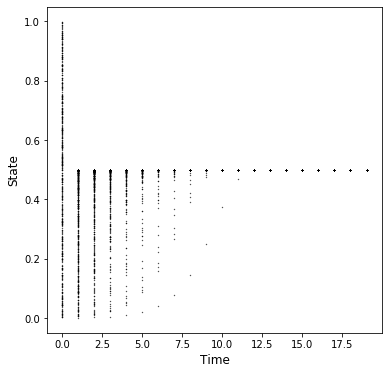

In [5]:
def f(x):
    return 2*x*(1-x)

fig, ax = plt.subplots(1, 1, figsize=(6,6))
ax.set_xlabel("Time")
ax.set_ylabel("State")

K = 500
N = 20
x = np.random.rand(K).reshape((K,1))
for i in range(N):
    ax.scatter(np.repeat(i, K),x, color = 'k', s=0.1);
    x = f(x)


## Chapter 1.2 Cobweb plots: Graphical representation of an orbit
***

### Cobweb plot
***
*Tldr*: go up/down until you hit graph of function, then left/right until you hit diagonal, rinse, lathe, repeat.  
**Def**: For a given one dimensional discrete time map $f$ and initial value $x_0$, the cobweb plot of its orbit is given by drawing the graph of $y=f(x)$, the graph of $y = x$. Then starting from $(x, x)$ we draw a line to $(x, f(x))$ and then to $(f(x), f(x))$ and then set $f(x)$ as out new working value, and repeat the previous two plotting steps.  
Ex: The cobweb plot of two different initial points.

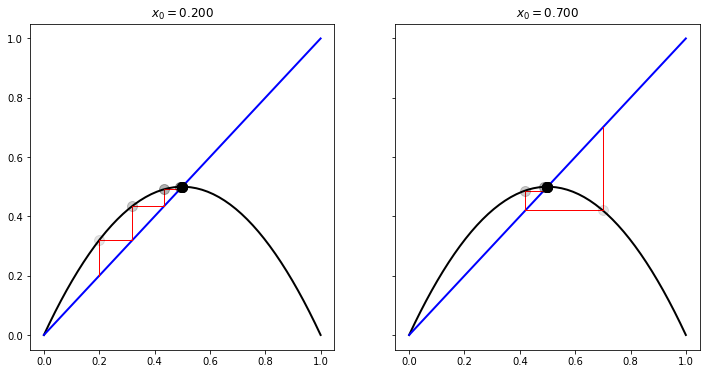

In [6]:
def f(x):
    return 2*x*(1-x)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6),
                               sharey=True)
cobweb_plot(0.2, f, None, 0, 1, 10, ax=ax1);
cobweb_plot(0.7, f, None, 0, 1, 10, ax=ax2);

## Chapter 1.3 Stability of fixed points  
***

### Stability of fixed points
**Def**: Let $f$ be a map on $\mathbb{R}^n$ and let $p$ be a fixed point. 
* If all points sufficiently close to $p$ are attracted to $p$, then $p$ is called a **sink** or a **stable** fixed point. More precisely, if there is an $\varepsilon > 0$ such that $\forall x\in N_\epsilon(p)$, $\lim_{k\rightarrow \infty} f^k (x) = p$, then $p$ is a sink.
* If all points sufficiently close to $p$ are repelled to $p$, then $p$ is called a **source** or an **unstable** fixed point. More precisely, if there is an $\varepsilon > 0$ such that $\forall x\in N_\epsilon(p)\setminus \{p\}$, $\lim_{k\rightarrow \infty} f^k (x) \cap N_\epsilon(p) = \emptyset$, then $p$ is a sink.

*Rem*: Note that some fixed points dont fit into either category.  
Ex: We have already shown that $0.5$ is an unstable fixed point of $2x(1-x)$ in Computer experiment 1.1. It can also be shown that $0$ is an unstable fixed point. If we consider, however the map $\frac{1}{1+\left\lfloor \frac{1}{x}\right\rfloor}$, then we can see that the fixed points $\frac{1}{n}$ where $n\in\mathbb{N}$ are neither attracting nor repelling, since points to the left are repelled and to the right are attracted. A similar situation can be observed with the map $x\left(1-x\sin\left(\frac{1}{x}\right)^2\right)$:

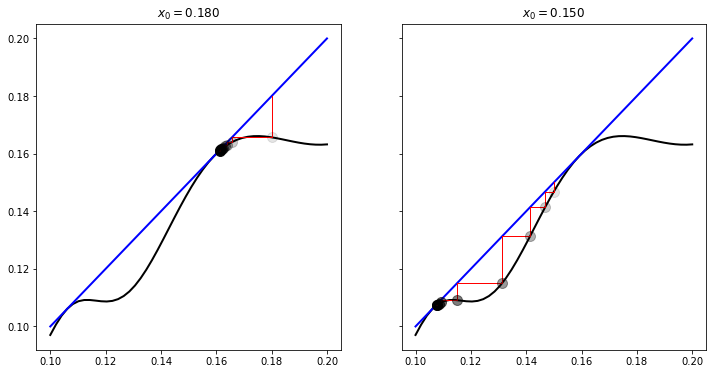

In [7]:
def f(x):
    return x*(1- x*np.power(np.sin(1/x),2))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6),
                               sharey=True)
cobweb_plot(0.18, f, None, 0.1, 0.2, 10, ax=ax1);
cobweb_plot(0.15, f, None, 0.1, 0.2, 10, ax=ax2);

Similarly, if we consider the simple map $-x$, the fixed point $0$ is neither attracting not repelling *at all* - points just sort of circle around:

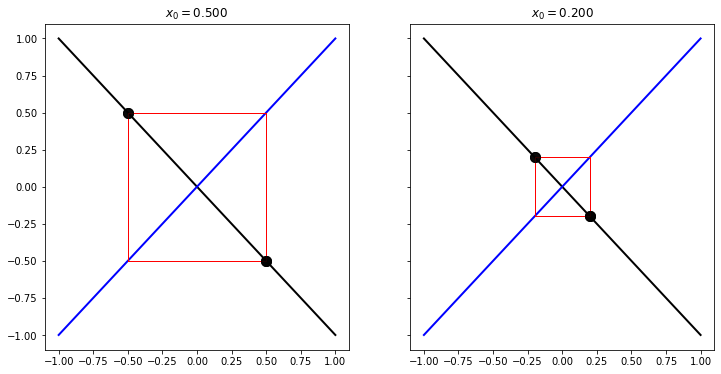

In [8]:
def f(x):
    return -x
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6),
                               sharey=True)
cobweb_plot(0.5, f, None, -1, 1, 10, ax=ax1);
cobweb_plot(0.2, f, None, -1, 1, 10, ax=ax2);

### Theorem 1.5
**Thm**: Let $f$ be a *smooth* map on $\mathbb{R}$ (or some subset of $\mathbb{R}$ in general) and $p$ a fixed point of $f$. Then:
* if $|f'(p)| < 1$ then $p$ is a stable fixed point
* if $|f'(p)| > 1$ then $p$ is an unstable fixed point

*Proof*: As 
$$\lim_{x\rightarrow p}\frac{|f(x)-f(p)|}{|x-p|} = |f'(p)| < 1$$
Then for $\epsilon = \frac{1-|f'(p)|}{2}>0$ there exists some $\delta>0$ s.t. for all $x\in N_\delta(p)$, $\frac{|f(x)-f(p)|}{|x-p|} < |f'(p)|+\epsilon = \frac{1+|f'(p)|}{2} < 1$. Lets call $\frac{1+|f'(p)|}{2} = a$. But then $|f(x)-f(p)| < a|x-p| < a\delta < \delta$, so $f(x)\in N_\delta(p)$ too. Therefore we can see that $f^k(x)\in N_\delta(p)$ for all $k>0$, but then 
$$\left|f^k(x) - p\right| = \left|f^k(x) - f^k(p)\right| < a\left|f^{k-1}(x) - f^{k-1}(p)\right| < \ldots < a^k|x-p|$$
But as $a<1$, $a^k|x-p|\rightarrow 0$ as $k\rightarrow 0$, so $\left|f^k(x) - p\right|\rightarrow 0$ as well. Therefore $f^k(x)\rightarrow p$. And so we are done.  
The argument for $|f'(p)|>1$ follows similarly.  
*Rem*: Note that in the above theorem we also established that the rate of convergence/divergence of $x$ to $p$ is in fact exponential (rate about $|f'(p)|$).  
Consider also the case $|f'(p)| = 1$. In this case we cannot establish anything using the above theorem, however one may note that if $f'(p) = 1$, then $f(x) = p+(x-p)(1+g(x-p))$ where $g$ is smooth. In such cases we can see that $f(x)-p = (x-p)(1+g(x-p))$, so if we let $\epsilon_k = f^k(x)-p$, then we see that 
$$\epsilon_k = f^k(x)-p = \left(f^{k-1}-p\right) + g\left(f^{k-1}-p\right) = \epsilon_{k-1} +g(\epsilon_{k-1}) = \ldots = \epsilon_0 + \sum_{i=0}^{k-1} g(\epsilon_{i})$$
So the convergence or divergence of this is fully determined by the sum $\sum_{i=0}^{k-1} g(\epsilon_{i})$.  
Similarly in the $f'(p) = -1$ case we get a sum of the form $\sum_{i=0}^{k-1} (-1)^{i+1}g(\epsilon_{i})$.  
These sums can sometimes be useful when considering the convergence/divergence if $g$ has some nice properties (i.e. is strictly positive etc).  
Ex: If $f(x) = 2x(1-x)$, then $f'(x) = 2-4x$, and so $|f'(0)| = 2>1$ and $\left|f'\left(\frac{1}{2}\right)\right| = 0 < 1$, indeed confirming our earlier hypothesis.

### Basin of attraction
**Def**: Let $p$ be a fixed point, then the **basin of attraction** of $p$ is the set of all $x$ s.t. $\lim_{k\rightarrow \infty} f^k(x) = p$.  
Ex: For the map $2x(1-x)$, the basin of $\frac{1}{2}$ is the set $(0, 1)$, since $0$ is a fixed point and $f(1) = 0$, and all other points are attracted to $\frac{1}{2}$. Therefore we conclude that the basin of $0$ is $\{0, 1\}$.

### Exercise T1.3
> Solve the inequality $|f (x) - 0| > |x - 0|$, where $f (x) =\frac{3x - x^3}{2}$. This
identifies points whose distance from $0$ increases on each iteration. Use
the result to find a large set of initial conditions that do not converge to
any sink of $f$.  

*Proof*: First note that $\frac{3x - x^3}{2} = x\Longleftrightarrow 3x-x^3 = 2x\Longleftrightarrow x(1-x)(1+x) = 0$, so the fixed points are $-1, 0, 1$, and $f'(x) = \frac{3}{2}(1-x^2)$, so $|f'(-1)| = |f'(1)| = 0<1$, therefore making these attracting fixed points and $|f'(0)| = frac{3}{2} > 1$, so $0$ is a repelling fixed point.  
Now consider $x\neq 0$, then 
$$|f(x)| > |x| \Longleftrightarrow \frac{|3x - x^3|}{2} > |x| \Longleftrightarrow |3 - x^2| > 2$$
So we have either $3 - x^2 > 2 \Rightarrow x\in (-1, 1)$ or $3-x^2 < -2\Rightarrow x\in (-\infty -\sqrt{5})\cup(\sqrt{5},\infty)$.  
Now note that points in $(-1, 1)$ all converge to either $-1$ or $1$ quite quickly. On the other hand the points in $(-\infty -\sqrt{5})\cup(\sqrt{5},\infty)$ diverge to $\pm \infty$. So we are done.

## Chapter 1.4 Periodic points
***

### Periodic points
*Tldr*: Point eventually returns exactly where it began.  
**Def**: Let $f$ me a map. We call $p$ a period $k$ point if $f^k(p) = p$ and $k$ is the smallest such positive integer.  
*Rem*: Period $1$ poins are fixed points of $f$. Every period $k$ point is a fixed point of $f^k$. Note that we defined periodic points wrt to the minimum period. So for example, if $f^4(p) = p$, then $p$ could be either a period one, two or four point, but in general we cannot tell which.  
Example: $0$ is a fixed point of the map $f(x) = -x$ and every other point is a period $2$ point as can be seen in the cobweb plots above. If we consider the map $f(x) = 3.1x(1-x)$, then the point $0.558$ is a period $2$ point as can be seen in the cobweb plot. Its orbit is $\{0.558, 765\}$.

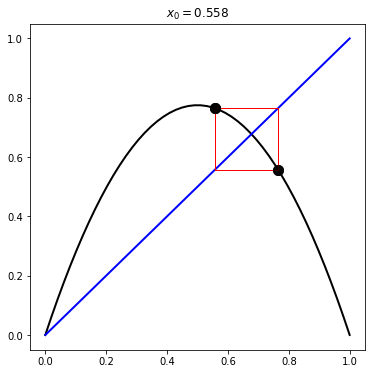

In [9]:
def f(x):
    return 3.1*x*(1-x)
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
cobweb_plot(0.558, f, None, 0, 1, 10, ax=ax);

### Exercise T1.5
> The map $f(x) = 2x^2-5x$ on $\mathbb{R}$ has fixed points at $x = 0$ and $x = 3$. Find a period $2$ orbit of $f$ by solving for $f^2(x) = x$.

First, consider the graphical and numerical approach:

The fixed points of f are p = 0.000 and p = 3.000
The period 2 orbit is p1 = -0.414, p2 = 2.414


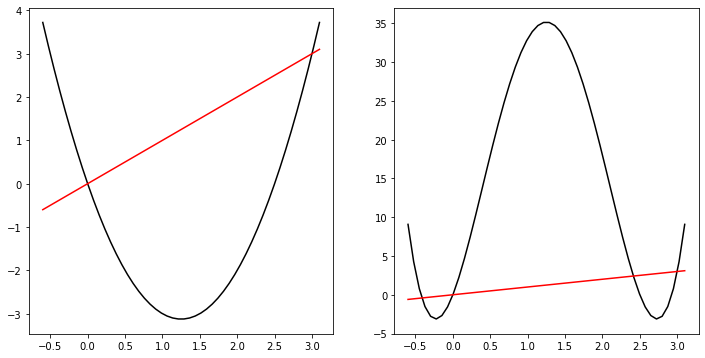

In [12]:
def f(x):
    return 2*x*x-5*x
x = np.linspace(-0.6, 3.1)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
ax1.plot(x, f(x), 'k')
ax1.plot(x, x, 'r')
ax2.plot(x, f(f(x)), 'k')
ax2.plot(x, x, 'r');

print("The fixed points of f are p = {0:.3f} and p = {1:.3f}".format( 
      optimize.root_scalar(lambda x: f(x)-x, x0 = -0.1, x1=0.1).root,
      optimize.root_scalar(lambda x: f(x)-x, x0 = 2.9, x1=3).root))
print("The period 2 orbit is p1 = {0:.3f}, p2 = {1:.3f}".format( 
      optimize.root_scalar(lambda x: f(f(x))-x, x0 = -0.5, x1=-0.3).root,
      optimize.root_scalar(lambda x: f(f(x))-x, x0 = 2.4, x1=2.5).root))

With a bit more work and more careful choice of limits it would be possible to approximate the period 2 points like this, but we seek an analytical approach.  
To this end we fist calculate $f(f(x)) = 2\cdot f(x)^2-5\cdot f(x) = 2(2x^2-5x)^2-5(2x^2-5x) = (2x^2-5x)(4x^2-10x-5)=x(2x-5)(4x^2-10x-5)$.  
Now we subtract $x$ and set it equal to $0$: 
$$0 = x(2x-5)(4x^2-10x-5)-x = x((2x-5)(4x^2-10x-5)-1) = x(8x^3-40x^2+40x+24) = 8x(x^3-5x^2+5x+3)$$
Now in general solving a cubic equation is very difficult but here we remark that if $f(p)=p$, then $f(f(p)) = f(p) = p$, therefore every fixed point will also be a root of this equation, so we can factor out the $x$ and $x-3$ terms and are left with only a quadratic.  
$$8x(x^3-5x^2+5x+3) = 8x(x-3)(x^2-2x-1) = 0$$
So now we know that the period $2$ points are the solutions of $x^2-2x-1 = 0$, i.e. $(x-1)^2-2 = 0$, so $1\pm\sqrt{2}$.  
It is indeed easy to verify that $f\left(1+\sqrt{2}\right) = 1-\sqrt{2}$ and $f\left(1-\sqrt{2}\right) = 1+\sqrt{2}$.

### Stability of periodic orbits
*Tldr*: For stability of periodic points just consider them as fixed points of $f^k$ and apply the same reasoning.  
**Def**: Let $f$ be a map and assume that $p$ is a period-$k$ point. The
period-$k$ orbit of $p$ is a periodic sink if $p$ is a sink for the map $f^k$. The orbit of $p$ is
a periodic source if $p$ is a source for the map $f^k$.  
*Rem*: Recall that $|f'(p)|$ determines the stability of a fixed point $p$. In a similar vein $\left|\left(f^k(p)\right)'\right|$ determines the stability of a periodic orbit. In particular, if $\{p_1, p_2, \ldots, p_k\}$ is a period $k$ orbit, then 
$$\left|\left(f^k(p_1)\right)'\right| = |f'(p_1)|\left|\left(f^{k-1}(f(p_1))\right)'\right| = 
|f'(p_1)|\left|\left(f^{k-1}(p_2)\right)'\right| = \ldots = |f'(p_1)||f'(p_2)|\ldots|f'(p_k)| = |f'(p_1)f'(p_2)\ldots f'(p_k)|$$
So in particular, $\{p_1, p_2, \ldots, p_k\}$ is a stable period $k$ orbit if $|f'(p_1)f'(p_2)\ldots f'(p_k)|<1$, and unstable if $|f'(p_1)f'(p_2)\ldots f'(p_k)|>1$. If $|f'(p_1)f'(p_2)\ldots f'(p_k)|=1$ we must take higher order terms to determine the stability.  
Example: Take $f(x) = 3.1x(1-x)$, then the period $2$ orbit $\{0.558, 765\}$ is stable as evidenced by the plots:

The fixed points of f are p = 0.677 and p = -0.000
The period 2 orbit of f is p1 = 0.558, p2 = 0.765


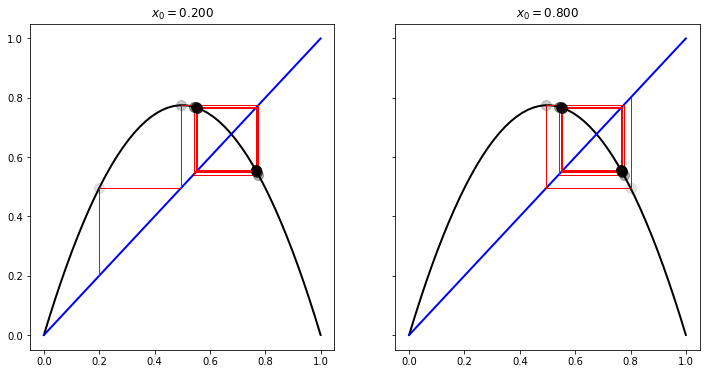

In [13]:
def f(x):
    return 3.1*x*(1-x)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6),
                               sharey=True)
cobweb_plot(0.2, f, None, 0, 1, 10, ax=ax1);
cobweb_plot(0.8, f, None, 0, 1, 10, ax=ax2);

print("The fixed points of f are p = {0:.3f} and p = {1:.3f}".format( 
      optimize.root_scalar(lambda x: f(x)-x, x0 = 0.6, x1 = 0.8).root,
      optimize.root_scalar(lambda x: f(x)-x, x0 = -0.1, x1 = 0.1).root))
print("The period 2 orbit of f is p1 = {0:.3f}, p2 = {1:.3f}".format( 
      optimize.root_scalar(lambda x: f(f(x))-x, x0 = 0.5, x1 = 0.6).root,
      optimize.root_scalar(lambda x: f(f(x))-x, x0 = 0.8, x1 = 0.9).root))

### Computer experiment 1.2
> Write a computer program with the goal of redoing Table 1.2 for the logistic
map $g_a(x)=ax(1-x)$, using $a=3.5$. What periodic behavior wins out in the
long run? Try several different initial conditions to explore the basin of the
attracting periodic behavior. Then try different values of $a < 3.57$ and report
your result.

We use our orbit function together with a cobweb plot:

a =  3.5
|   n\x_0 |   0.2 |   0.5 |   0.95 |
|---------+-------+-------+--------|
|       0 | 0.200 | 0.500 |  0.950 |
|       1 | 0.560 | 0.875 |  0.166 |
|       2 | 0.862 | 0.383 |  0.485 |
|       3 | 0.415 | 0.827 |  0.874 |
|       4 | 0.850 | 0.501 |  0.385 |
|       5 | 0.446 | 0.875 |  0.829 |
|       6 | 0.865 | 0.383 |  0.497 |
|       7 | 0.409 | 0.827 |  0.875 |
|       8 | 0.846 | 0.501 |  0.383 |
|       9 | 0.456 | 0.875 |  0.827 |
|      10 | 0.868 | 0.383 |  0.501 |
|      11 | 0.400 | 0.827 |  0.875 |
|      12 | 0.840 | 0.501 |  0.383 |
|      13 | 0.470 | 0.875 |  0.827 |
|      14 | 0.872 | 0.383 |  0.501 |
|      15 | 0.391 | 0.827 |  0.875 |
|      16 | 0.833 | 0.501 |  0.383 |
|      17 | 0.486 | 0.875 |  0.827 |
|      18 | 0.874 | 0.383 |  0.501 |
|      19 | 0.385 | 0.827 |  0.875 |
|      20 | 0.828 | 0.501 |  0.383 |
a =  3.1
|   n\x_0 |   0.2 |   0.5 |   0.95 |
|---------+-------+-------+--------|
|       0 | 0.200 | 0.500 |  0.950 |
|       1 | 0.496 | 

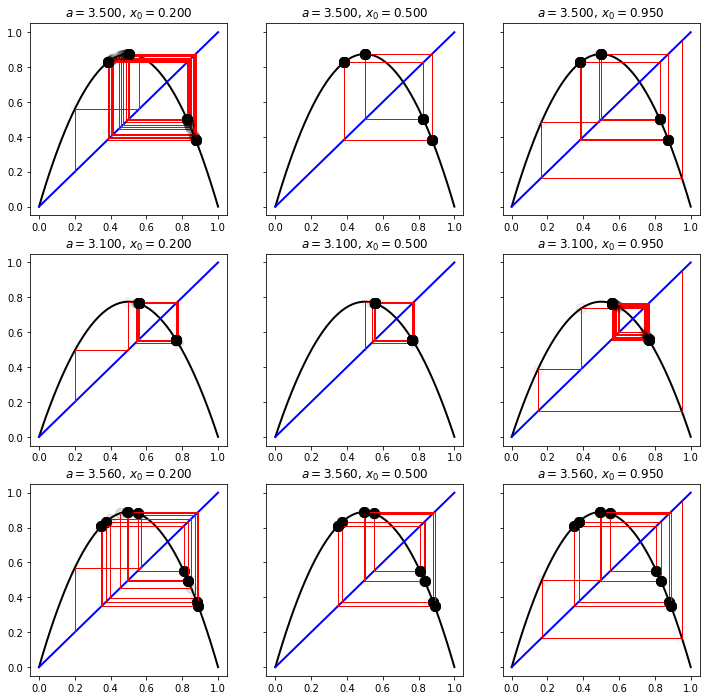

In [14]:
def g_a(x, a):
    return a*x*(1-x)
fig, axs = plt.subplots(3, 3, figsize=(12, 12),
                               sharey=True)

N = 20
a = [3.5, 3.1, 3.56]
x0 = [0.2, 0.5, 0.95]
for i in range(len(a)):
    print("a = ", a[i])
    data = [range(N+1)]
    for x in x0:
        data.append(orbit_of_map(x, g_a, a[i], N))
    labels = ["n\\x_0"]
    labels.extend(map(str, x0))
    print(tabulate(dict(zip(labels,data)), 
                   headers="keys", 
                   floatfmt=".3f",
                   tablefmt="orgtbl"))
    for j in range(len(x0)):
        cobweb_plot(x0[j], g_a, a[i], 0, 1, 45, ax=axs[i,j]);

As can be seen, in the $a = 3.5$ case, most initial conditions tend towards a period $4$ orbit. It is interesting to note that not all initial values tend to the fixed points equally as fast, with the $x_0 = 0.2$ condition taking more iterations to converge.  
In the $a = 3.1$ case a period $2$ cycle emerges. In the $a=3.56$ case we get a period $8$ cycle.

## Chapter 1.5 The Family of Logistic Maps
*** 

### Exercise T1.6
> Verify the statements in the previous paragraph by solving for the fixed
points and period-two points of $g_a(x)$ and evaluating their stability

*Proof*: Consider $a\neq 1$, then $$g_a(x) = x \Longrightarrow ax(1-x) = x\Longrightarrow x(a-ax-1)=0\Longrightarrow x =0 \textrm{ or } x=1-\frac{1}{a}$$
Furthermore $g_a^\prime(x) = a(1-2x)$, so $|g_a^\prime(0)| = |a|$, so $0$ is a sink for $0<a<1$, and a cource for $a>1$, and $$\left|g_a^{\prime}\left(1-\frac{1}{a}\right)\right|=\left|a\left(1-2+\frac{2}{a}\right)\right|=\left|2-a\right|$$
o, $1-\frac{1}{a}$ is a source for $0<a<1$ and $a>3$, and then a sink for $1 < a < 3$.  
Were not even gonna attempt the period $2$ points.

### Computer experiment 1.3
>Use your logistic map program to investigate the long-run behavior of $g_a$
for $a$ near $a_*= 1+\sqrt{6}\approx 3.449$. Repeat Table 1.2 for values of $a$ slightly smaller than
$a_*$. What qualitative or quantitative conclusions can be made about the speed
of convergence to the period-two orbit as a gets closer to $a_*$? What happens to
iterations beginning at a period-two point for a slightly larger than $a_*$?  

*Proof*: We will use out cobweb plot to figure it out:

a =  3.349489742783178
|   n\x_0 |   0.1 |   0.5 |   0.8 |
|---------+-------+-------+-------|
|       0 | 0.100 | 0.500 | 0.800 |
|       1 | 0.301 | 0.837 | 0.536 |
|       2 | 0.705 | 0.456 | 0.833 |
|       3 | 0.696 | 0.831 | 0.466 |
|       4 | 0.708 | 0.471 | 0.833 |
|       5 | 0.692 | 0.834 | 0.465 |
|       6 | 0.714 | 0.463 | 0.833 |
|       7 | 0.684 | 0.833 | 0.465 |
|       8 | 0.724 | 0.467 | 0.833 |
|       9 | 0.669 | 0.834 | 0.465 |
|      10 | 0.742 | 0.465 | 0.833 |
|      11 | 0.641 | 0.833 | 0.465 |
|      12 | 0.771 | 0.466 | 0.833 |
|      13 | 0.592 | 0.833 | 0.465 |
|      14 | 0.809 | 0.465 | 0.833 |
|      15 | 0.518 | 0.833 | 0.465 |
|      16 | 0.836 | 0.465 | 0.833 |
|      17 | 0.459 | 0.833 | 0.465 |
|      18 | 0.832 | 0.465 | 0.833 |
|      19 | 0.469 | 0.833 | 0.465 |
|      20 | 0.834 | 0.465 | 0.833 |
a =  3.439489742783178
|   n\x_0 |   0.1 |   0.5 |   0.8 |
|---------+-------+-------+-------|
|       0 | 0.100 | 0.500 | 0.800 |
|       1 | 0.310 

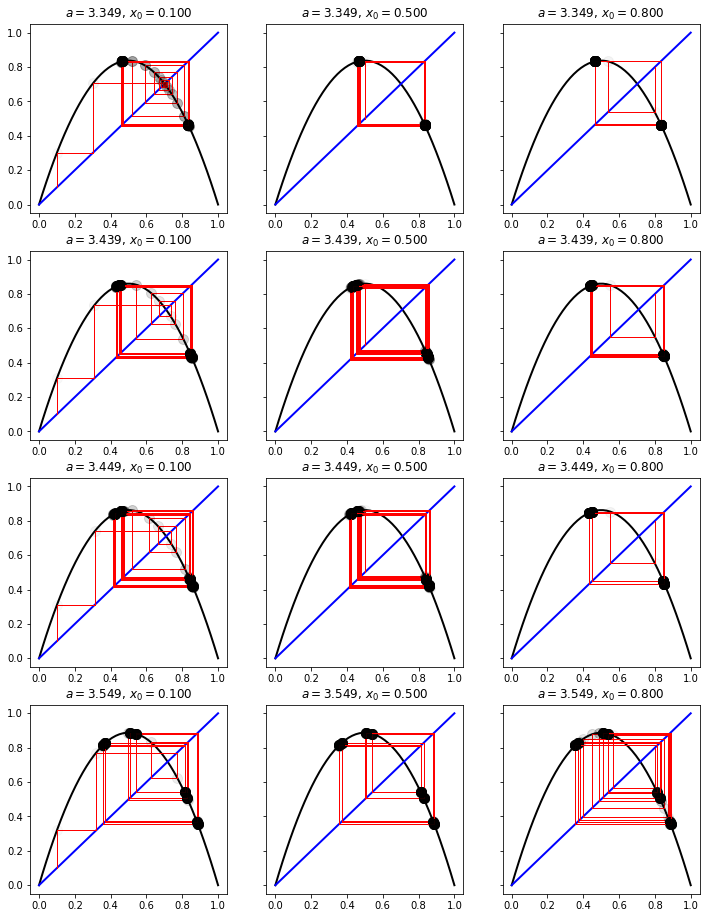

In [15]:
fig, axs = plt.subplots(4, 3, figsize=(12, 16),
                               sharey=True)

a = 1+6**.5
x0 = [0.1, 0.5, 0.8]
eps = [-(1e-1), -(1e-2), 0, 1e-1]
N = 20
for i in range(len(eps)) :
    print("a = ", a+eps[i])
    data = [range(N+1)]
    for x in x0:
        data.append(orbit_of_map(x, g_a, a+eps[i], N))
    labels = ["n\\x_0"]
    labels.extend(map(str, x0))
    print(tabulate(dict(zip(labels,data)), 
                   headers="keys", 
                   floatfmt=".3f",
                   tablefmt="orgtbl"))
    for j in range(len(x0)):
        cobweb_plot(x0[j], g_a, a+eps[i], 0, 1, 45, ax=axs[i,j]);

### Bifurcation diagram
**TODO**

## Chapter 1.6 The Logistic Map $G(x) = 4x(1-x)$
*** 

### Exercise T1.7
> Find the period-two orbit of $G(x) = 4x(1 - x)$

*Proof*: Lets dive in, shall we? $G(G(x)) = 4G(x)(1-G(X)) = 16x(1-x)(1-4x(1-x))$, the period $2$ fixed points satisfy $G(G(x)) = x$, so we solve $G(G(x)) -x = 0$, i.e.
$$0 = 16x(1-x)(1-4x(1-x)) - x = 16x(1-x)(1-4x+4x^2)-x = x(16-80x+128x^2-64x^3)-x = x(15-80x+128x^2-64x^3)$$
We know that the fixed points are $0, \frac{3}{4}$, and they also satisfy $G(G(x)) = x$, so we can divide the above polynomial by $x$ and $3-4x$ to eliminate these solutions:
$$x(15-80x+128x^2-64x^3) = x(3-4x)(16x^2-20x+5) = 0$$
So in the end we only need to solve $16x^2-20x+5=0$, $D = 400-20\cdot16=80$, so $x = \frac{20\pm4\sqrt{5}}{32} = \frac{5\pm\sqrt{5}}{8}$.
So the period-two orbit is $\left\{\frac{5+\sqrt{5}}{8},\frac{5-\sqrt{5}}{8}\right\}$.

### Exercise T1.8
> Let $G(x)= 4x(1 - x)$. Prove that for each positive integer $k$, there is an
orbit of period-$k$.

*Proof*: Note that $G\left(\left[0,\frac{1}{2}\right]\right) = [0,1]$ and $G\left(\left[\frac{1}{2}, 1\right]\right) = [0,1]$. Since $G(X)$ has a single "bump" in $[0,1]$, then $G^2(x)$ will have two - one in each of $\left[0,\frac{1}{2}\right],\left[\frac{1}{2}, 1\right]$. Note that each bump goes from $0$ to $1$ in the range. By induction $G^k(x)$ will have $2^{k-1}$ bumps. 

Note that each bump neccesarily intersects $y=x$ in two places, so we have a total of $2^k$ fixed points of $G^k$. If $n$ divides $k$, then clearly every period $n$ point will be a fixed point of $G^k$ and on the other hand every fixed point of $G^k$ is a period $n$ point where $n$ is some divisor of $k$. So if we can account for all the fixed points of $G^k$ that are period $n$-points for $n\neq k$, then we know exactly how many period $k$ points there are. 

If $k=1$, then the pricture is clear, two fixed points. Let $k$ be prime, then the only other fixed points will have period $1$, i.e. be the two fixed points of $G$. Therefore we see that there are $2^k -2 >0$ period $k$ points. Finally, if $k$ is not prime, then let $k = p*a$ where $p$- is the smallest prime dividing $k$, so that $1 < p\leq a$, then every number $n\neq k$ that divides $k$ must either be $p$ or divide $a$, as it has to divide one of them and if it divides both, then either it is equal to $k$ or is a divisor of $a$. So in short there are no more than $2^p + 2^a$ fixed points of $G^k$ that have period less than $k$. 

But now finally we see that 
$$2^k-2^a-2^p = 2^{ap}-2^a-2^p = 2^p\left(2^{(a-1)p}-2^{a-p}-1\right) > 2^p\left(2^{2a-2}-2^a-1\right) = 2^{p-2}\left(2^a-2\right)^2 > 0$$
So in particular there is at least one period $k$ point. So we are done

### Exercise T1.9
> 

## Exercises
***

### Exercise 1.1
> Let $l(x) = ax + b$, where $a$ and $b$ are constants. For which values of $a$ and $b$ does $l$
have an attracting fixed point? A repelling fixed point?

*Proof*: For there to be any fixed points at all we have $ax + b = x\Rightarrow (a-1)x = -b$, so if $a\neq 1$ we have $p = \frac{b}{1-a}$ as a fixed point and otherwise we only have a fixed point if $b= 0$, in which case our map in $l(x) = x$, so every point is a fixed point, but is neither attracting nor repelling. If we have $l(x) = x+ b$, $b\neq 0$, then we have no fixed points, and we can see that all initial conditions diverge to either plus or minus infinity depending on the sign of $b$.  
Now consider the case $a\neq 1$, then $f'(x) = a$, so $\frac{b}{1-a}$ is attracting if $|a|<1$ and repelling if $|a|>1$.  
Finally consider $a = -1$, then $f(x) = -x+b$, so $f(f(x)) = -(-x+b)+b = x$, so every point apart from $\frac{b}{2}$ is a period $2$ fixed point, so $0$ is neither attracting nor repelling.

### Exercise 1.2
> 